In [152]:
from scipy.io import wavfile
sampling_rate, audio_samples = wavfile.read('X.wav')
print(sampling_rate)

16000


In [153]:
import IPython.display as ipd


ipd.Audio(audio_samples, rate=16000) # load a NumPy array

In [154]:
audio_samples.dtype

dtype('int16')

In [155]:
print(audio_samples)

[466 660 465 ...   8  10   7]


In [156]:
type(audio_samples)

numpy.ndarray

In [157]:
audio_samples.shape

(63488,)

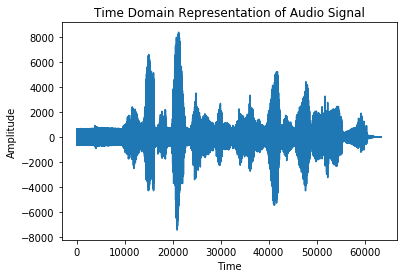

In [158]:
from matplotlib import pyplot as plt
plt.plot(audio_samples);
plt.ylabel('Amplitude');
plt.xlabel('Time');
plt.title('Time Domain Representation of Audio Signal');

In [159]:
N=int(input('Choose a value for N'))

Choose a value for N1600


In [160]:
import numpy as np

dft_matrix=[]
for freq in range(0,N):
    ind_comp=[]
    for n in range(0,N):
        ind_comp.append(np.exp(-2j*np.pi*freq*n/N))
    dft_matrix.append(ind_comp)

In [161]:
dft_matrix=np.array(dft_matrix)

In [162]:
dft_matrix.shape

(1600, 1600)

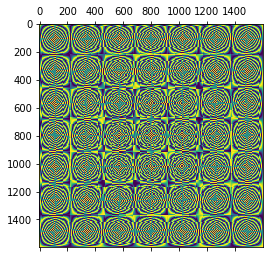

In [163]:
plt.matshow(dft_matrix.real,aspect='auto');

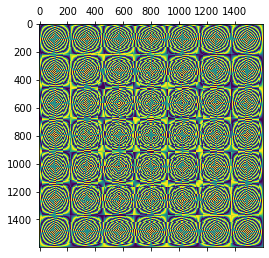

In [164]:
plt.matshow(dft_matrix.imag,aspect='auto');

In [165]:
#hann_window=[]
#for i in range(0,N):
#    hann_window.append(np.sin(np.pi*i/N)**2)
def create_hwindow(x):
    hann_window=[]
    for i in range(0,x):
        hann_window.append(np.sin(np.pi*i/x)**2)
    return hann_window

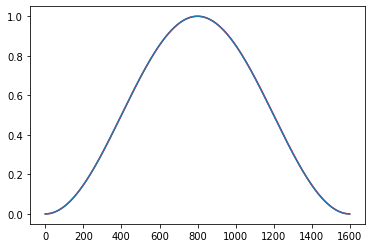

In [166]:
plt.plot(create_hwindow(N),color='red');
plt.plot(np.hanning(N));

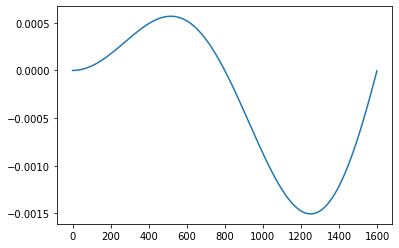

In [167]:
plt.plot(np.hanning(N)-create_hwindow(N))

In [168]:
left_index=0
right_index=1600

count=0
while left_index<=len(audio_samples):
    left_index=right_index/2
    right_index+=int(N/2)
    count+=1

print(left_index)
print(right_index)
print(count)

63600.0
128000
158


In [169]:
import math
def process_audio_samples(sample,N):
    print(len(sample))
    quotient=len(sample)//N
    padding_required=round((quotient+1-(len(sample)/N))*N)
    print(padding_required)
    
    zeros=np.zeros((1,padding_required))
    
    processed_audio=np.append(sample,zeros)
    
    print(len(processed_audio))
    
    return processed_audio

process_audio_samples(audio_samples,N)

63488
512
64000


array([466., 660., 465., ...,   0.,   0.,   0.])

In [170]:
X=[]
left_index=0
right_index=N

count=0
hann_window=np.hanning(N)
p_audio=process_audio_samples(audio_samples,N)
print(len(p_audio))
while right_index<=len(p_audio):
    audio_slice=audio_samples[left_index:right_index]
    if len(audio_slice)==N:
        trans_frame=np.multiply(hann_window,p_audio[left_index:right_index])
        X.append(trans_frame)
    
    left_index+=int(N/2)
    right_index+=int(N/2)
    count+=1
    print('Slice',count)
X=np.array(X)

63488
512
64000
64000
Slice 1
Slice 2
Slice 3
Slice 4
Slice 5
Slice 6
Slice 7
Slice 8
Slice 9
Slice 10
Slice 11
Slice 12
Slice 13
Slice 14
Slice 15
Slice 16
Slice 17
Slice 18
Slice 19
Slice 20
Slice 21
Slice 22
Slice 23
Slice 24
Slice 25
Slice 26
Slice 27
Slice 28
Slice 29
Slice 30
Slice 31
Slice 32
Slice 33
Slice 34
Slice 35
Slice 36
Slice 37
Slice 38
Slice 39
Slice 40
Slice 41
Slice 42
Slice 43
Slice 44
Slice 45
Slice 46
Slice 47
Slice 48
Slice 49
Slice 50
Slice 51
Slice 52
Slice 53
Slice 54
Slice 55
Slice 56
Slice 57
Slice 58
Slice 59
Slice 60
Slice 61
Slice 62
Slice 63
Slice 64
Slice 65
Slice 66
Slice 67
Slice 68
Slice 69
Slice 70
Slice 71
Slice 72
Slice 73
Slice 74
Slice 75
Slice 76
Slice 77
Slice 78
Slice 79


In [171]:
X=X.T

In [172]:
X.shape

(1600, 78)

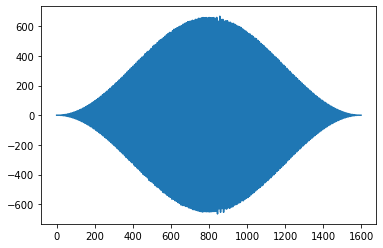

In [173]:
plt.plot(X[:,0]);

In [174]:
for i in X[:,-1]:
    print(i)

0.0
-2.3160797500532126e-05
7.720236032293659e-05
0.0001737041931845762
0.0011734577578889072
0.0020265071993550987
0.002501253483193633
0.006052314595256902
0.007163825944671187
0.0031263858218205653
-0.0015438564881642414
-0.0065380555553935515
-0.003890298086414057
-0.0032611072769250793
-0.0015127924729397835
-0.0008682796042282503
0.005927218986728544
0.006690990423676602
0.013751796929156235
0.018107213883538198
0.01234608491960243
0.03062439108978854
0.03547572654073933
-0.008162493519558778
-0.05998838440928961
-0.08919392459263042
-0.08082271175721223
-0.11807887977380171
-0.10279207776365229
-0.04540010292692087
0.003470102779028428
0.06669013947981295
0.1381651522045435
0.12593409356494834
0.16931606457666104
0.2124549075900048
0.1748040628286912
0.08967885170969692
0.03338214096445491
0.04687830487860589
0.036981095078991943
0.038849212086261464
0.061144576254064054
0.07120430296274627
-0.05963703287317035
0.1169464962662195
0.11404171722222434
0.06802268235403908
0.1241439

In [175]:
sum(X[:,0])

2158.6451214598032

In [176]:
X_c=np.copy(X)
X_c=X_c.flatten()
X_c.shape

(124800,)

In [177]:
import IPython.display as ipd


ipd.Audio(X_c, rate=16000) 

In [178]:
spect=np.dot(dft_matrix,X)

In [179]:
X

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 2.54768773e-03,  2.54382759e-03,  2.54382759e-03, ...,
        -4.51635551e-04,  1.42824918e-04, -2.31607975e-05],
       [ 7.17981951e-03,  7.21070045e-03,  7.21070045e-03, ...,
        -1.97638042e-03, -1.54404721e-05,  7.72023603e-05],
       ...,
       [-1.00671878e-02, -9.97454495e-03, -1.00208664e-02, ...,
        -2.62488025e-04,  7.72023603e-05,  3.08809441e-05],
       [-1.79110167e-03, -1.77180101e-03, -1.77180101e-03, ...,
        -5.79019938e-05, -1.93006646e-05,  1.54405317e-05],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -0.00000000e+00,  0.00000000e+00]])

In [180]:
mag_spect=np.abs(spect)

In [181]:
mag_spect.shape

(1600, 78)

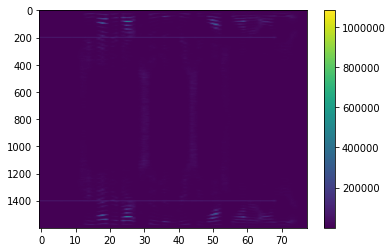

In [182]:
plt.imshow(mag_spect,aspect='auto',interpolation='bilinear');
plt.colorbar();

<Figure size 576x576 with 0 Axes>

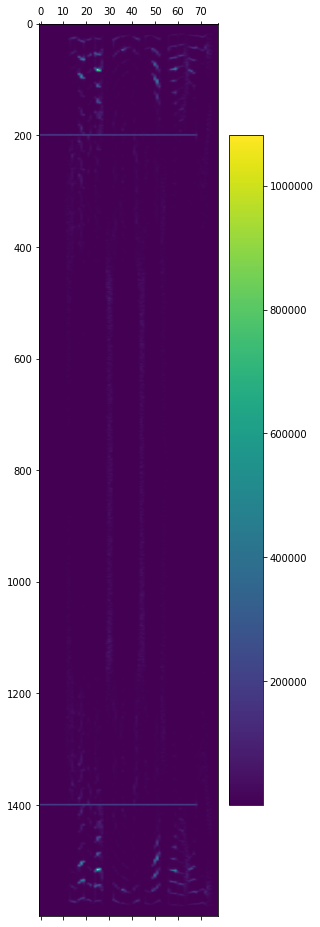

In [183]:
import numpy as np
import matplotlib.pyplot as plt

w=101
h=10
fig=plt.figure(figsize=(8, 8))
plt.matshow(mag_spect,aspect='auto',interpolation='bilinear');
plt.colorbar()

In [184]:
mag_spect[190:210,0]

array([6.45521370e+01, 4.46358287e+01, 3.27786737e+01, 3.97930255e+01,
       6.44090961e+01, 5.97052547e+01, 4.89017436e+01, 3.08957491e+01,
       7.33398396e+01, 1.31154219e+05, 2.62045772e+05, 1.31155912e+05,
       7.97138905e+01, 5.48948839e+01, 3.75820285e+01, 2.46749547e+01,
       3.01306358e+01, 1.65402901e+01, 1.26389926e+01, 1.84073304e+01])

In [185]:
mag_spect[194,:]=[0]*78
mag_spect[195,:]=[0]*78
mag_spect[196,:]=[0]*78
mag_spect[197,:]=[0]*78
mag_spect[198,:]=[0]*78
mag_spect[199,:]=[0]*78
mag_spect[200,:]=[0]*78
mag_spect[201,:]=[0]*78
mag_spect[202,:]=[0]*78
mag_spect[203,:]=[0]*78
mag_spect[204,:]=[0]*78


In [186]:
mag_spect[199,:]=[0]*78

In [187]:
mag_spect[200,:]=[0]*78

In [188]:
mag_spect[201,:]=[0]*78

In [189]:
mag_spect[190:210,0]

array([64.55213701, 44.63582872, 32.77867371, 39.79302554,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       24.6749547 , 30.13063578, 16.54029014, 12.63899265, 18.40733035])

In [190]:
mag_spect[1390:1410,0]

array([2.25123249e+01, 1.84073304e+01, 1.26389927e+01, 1.65402901e+01,
       3.01306358e+01, 2.46749547e+01, 3.75820285e+01, 5.48948839e+01,
       7.97138905e+01, 1.31155912e+05, 2.62045772e+05, 1.31154219e+05,
       7.33398396e+01, 3.08957491e+01, 4.89017436e+01, 5.97052547e+01,
       6.44090961e+01, 3.97930256e+01, 3.27786737e+01, 4.46358287e+01])

In [191]:
mag_spect[1395,:]=[0]*78
mag_spect[1396,:]=[0]*78
mag_spect[1397,:]=[0]*78
mag_spect[1398,:]=[0]*78
mag_spect[1399,:]=[0]*78
mag_spect[1400,:]=[0]*78
mag_spect[1401,:]=[0]*78
mag_spect[1402,:]=[0]*78
mag_spect[1403,:]=[0]*78
mag_spect[1404,:]=[0]*78
mag_spect[1405,:]=[0]*78


In [192]:
mag_spect[1390:1410,0]

array([22.51232493, 18.40733035, 12.63899265, 16.54029014, 30.13063578,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        , 64.4090961 , 39.79302556, 32.77867371, 44.63582873])

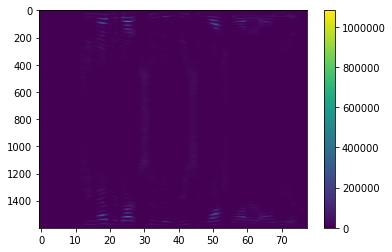

In [193]:
plt.imshow(mag_spect,aspect='auto',interpolation='bilinear');
plt.colorbar();

<Figure size 576x576 with 0 Axes>

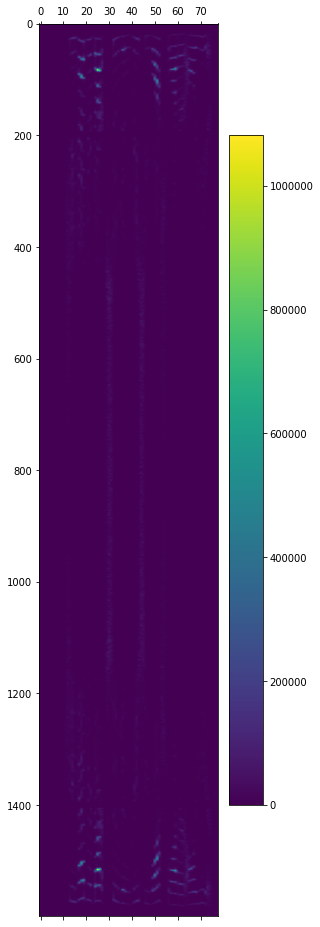

In [194]:
import numpy as np
import matplotlib.pyplot as plt

w=101
h=10
fig=plt.figure(figsize=(8, 8))
plt.matshow(mag_spect,aspect='auto',interpolation='bilinear');
plt.colorbar()

In [204]:
idft_matrix=[]
for freq in range(0,N):
    ind_comp=[]
    for n in range(0,N):
        ind_comp.append(np.exp(2j*np.pi*(n/N)*freq))
    idft_matrix.append(ind_comp)

In [205]:
idft_matrix=np.array(idft_matrix)
idft_matrix.shape

(1600, 1600)

In [206]:
clean_X=np.copy(mag_spect)
inv_spect=1/N*idft_matrix.dot(clean_X)


In [207]:
inv_spect

array([[  69.76185756+0.j        ,   52.45873823+0.j        ,
         128.66023618+0.j        , ..., 1024.05446128+0.j        ,
         336.7275506 +0.j        ,  127.9379456 +0.j        ],
       [  25.83164025-0.01666964j,    2.66385544+0.02962007j,
         -27.81841202+0.00068351j, ...,  764.10224869-0.08307459j,
         220.36113864+0.1704961j ,   56.18369358-0.22090624j],
       [  24.58072544-0.02480104j,    8.91871268+0.04090428j,
          17.27255985-0.00102679j, ...,  533.08766279-0.13864645j,
         126.80396843+0.23151446j,   29.27802432-0.3228184j ],
       ...,
       [  14.20946183+0.02016039j,    5.37880559-0.02685709j,
           7.52089642+0.00496383j, ...,  285.675765  +0.14310772j,
          57.39053313-0.14344396j,   16.50655456+0.25060441j],
       [  24.58072544+0.02480104j,    8.91871268-0.04090428j,
          17.27255985+0.00102679j, ...,  533.08766279+0.13864645j,
         126.80396843-0.23151446j,   29.27802432+0.3228184j ],
       [  25.83164025+0.0166

In [208]:
inv_spect.real

array([[  69.76185756,   52.45873823,  128.66023618, ..., 1024.05446128,
         336.7275506 ,  127.9379456 ],
       [  25.83164025,    2.66385544,  -27.81841202, ...,  764.10224869,
         220.36113864,   56.18369358],
       [  24.58072544,    8.91871268,   17.27255985, ...,  533.08766279,
         126.80396843,   29.27802432],
       ...,
       [  14.20946183,    5.37880559,    7.52089642, ...,  285.675765  ,
          57.39053313,   16.50655456],
       [  24.58072544,    8.91871268,   17.27255985, ...,  533.08766279,
         126.80396843,   29.27802432],
       [  25.83164025,    2.66385544,  -27.81841202, ...,  764.10224869,
         220.36113864,   56.18369358]])

In [221]:
inv_spect=inv_spect.real

In [222]:
inv_spect.shape

(1600, 78)

In [223]:
recovered_signal=inv_spect[:,0]
#for i in range(1,inv_spect.shape[1]):
recovered_signal.shape    

(1600,)

In [224]:
len(recovered_signal[-40:-1])

39

In [225]:
for i in range(1,inv_spect.shape[1]):
    #print(i)
    
    #f1=recovered_signal[-((N//2)+1):-1]
    frame=inv_spect[:,i]
    f1=inv_spect[:N//2,i]
    f2=inv_spect[N//2:,i]
    print('Before',recovered_signal[-((N//2)+1):-1])
    recovered_signal[-((N//2)+1):-1]+=f1
    #print('After',recovered_signal[-((N//2)+1):-1])
    
    recovered_signal=np.append(recovered_signal,f2)
    
    print('After',recovered_signal[-((N//2)+1):-1])

Before [ 4.74903517e-01  5.78675673e-01  4.74903517e-01  4.93668919e-01
  2.15748585e-01  3.76468756e-01  4.78186923e-01  9.43219673e-02
  6.38144672e-01  1.10913313e-01 -9.91558127e-02 -4.35259572e-02
  4.29794923e-01  1.44040503e-01 -5.41406744e-01 -2.41259319e-01
  1.04695332e-01 -2.31045781e-01 -1.95884630e-01 -4.67106292e-01
 -1.96104092e-01 -3.51936688e-01 -1.16309137e-01 -2.65064752e-01
 -1.44324476e-01  1.44575033e-01 -2.07552908e-01 -1.29758236e-01
  4.29543113e-02  1.56083394e-01  4.21931864e-02  4.95073858e-01
  1.11854243e-01  1.88745779e-01  2.58275085e-01  3.15037956e-01
  2.86628033e-01 -5.36827131e-02  3.10334496e-01  4.50101206e-01
  1.46793975e-01  2.27818043e-01 -1.41015087e-01  3.92797952e-01
 -2.10768316e-01  3.99536694e-02 -5.81406766e-02 -5.64120947e-01
  3.37226549e-01 -5.55522623e-01  3.43385196e-02 -5.06433168e-01
 -1.93516761e-01  7.32430456e-02 -6.41324031e-01 -3.52304398e-01
 -3.33641540e-02 -4.51124131e-02 -4.11065479e-01 -1.03073850e-01
  1.69046029e-01 -

After [ 1.13821841e+04  6.17662019e+01  6.96766207e+01  7.40699281e+01
  6.71519309e+01  5.03377624e+01  2.24555572e+01 -9.43265653e+00
 -4.84232452e+01 -7.63744013e+01 -8.63671465e+01 -7.79560844e+01
 -5.44196363e+01 -2.00987648e+01  9.94091674e+00  5.27362263e+00
 -1.21637771e+01 -1.39975516e+01  7.93823525e+00  3.64762437e+01
  4.05235687e+01  3.49507832e+01  2.18511842e+01  9.12221502e+00
 -1.28891604e+01 -4.03497376e+01 -5.37272209e+01 -5.15191930e+01
 -3.29669501e+01 -1.34028143e+01  1.45833714e+01  3.59242083e+01
  4.42305701e+01  3.44495734e+01  8.13018653e+00 -7.89157093e+00
  1.64432157e+00  3.24762731e+01  2.96551839e+01 -6.00853648e+00
 -3.95201340e+01 -5.55020499e+01 -5.79713928e+01 -6.85604576e+01
 -6.83102533e+01 -4.97105154e+01 -8.60309039e+00  3.01488989e+01
  4.52370898e+01  5.79580660e+01  6.11880524e+01  7.50989302e+01
  8.80479044e+01  8.54342901e+01  8.15798109e+01  6.24959510e+01
  4.21527057e+01  1.62962473e+01 -1.47962427e+01 -5.46839576e+01
 -7.95415197e+01 -8

After [ 5.90777987e+02  2.73322392e+00 -1.90530700e+00 -8.66932039e+00
 -9.15934454e+00 -2.96683932e+00  3.41195067e+00  6.15724407e+00
  7.76968262e+00  1.14455765e+01  1.70243577e+01  1.89835296e+01
  1.40615612e+01  1.83237800e+00 -8.69599480e+00 -1.00598330e+01
 -6.35194991e+00 -3.84975146e+00 -4.45151052e+00 -2.91777456e+00
  3.24039467e+00  9.69676664e+00  9.32328772e+00  1.00300960e+01
  1.18346417e+01  1.24235580e+01 -1.09226415e+00 -2.22314784e+01
 -3.67624830e+01 -3.03654464e+01 -1.40557488e+01 -3.69361284e+00
 -4.06291629e+00 -8.99416408e-01  9.72177591e+00  1.64122979e+01
  1.04298834e+01 -1.10383723e+00 -4.68461211e+00 -3.56053744e+00
 -5.55142277e+00 -1.56951433e+01 -1.75965836e+01 -6.03668621e+00
  1.11782572e+01  2.16474125e+01  2.16888664e+01  1.53829766e+01
  1.08613276e+01  6.23418044e+00 -4.46692786e-01 -9.43336545e+00
 -1.22461996e+01 -1.16383733e+01 -1.13163985e+01 -1.40089416e+01
 -1.01423859e+01  7.22550414e-01  1.16190131e+01  1.27399949e+01
  6.81746968e+00  5

After [ 6.46631969e+03 -2.20232482e+01 -1.50742897e+01  1.28679674e+00
  1.41361933e+01  2.09150286e+01  1.55657762e+01  3.09321871e+00
 -1.55970018e+01 -3.23090820e+01 -3.46478146e+01 -3.04617673e+01
 -1.43964709e+01  3.88171427e+00  1.63778747e+01  3.06533664e+01
  3.52820387e+01  2.89667152e+01  1.20266589e+01 -3.87005882e+00
 -1.41589979e+01 -2.50431408e+01 -4.26568367e+01 -5.46349607e+01
 -5.97515913e+01 -8.23341974e+01 -1.16751379e+02 -1.45306524e+02
 -1.69279648e+02 -1.80792951e+02 -1.66945937e+02 -1.39312500e+02
 -1.06070588e+02 -6.77545455e+01 -1.96781652e+01  3.71796902e+01
  8.47491090e+01  1.35557078e+02  1.89435317e+02  2.63445077e+02
  3.38644755e+02  3.96259133e+02  3.98355167e+02  3.63620677e+02
  3.10613640e+02  2.41993020e+02  1.42115112e+02  2.80173735e+01
 -6.21194389e+01 -1.17081970e+02 -1.31209265e+02 -1.38692360e+02
 -1.47814246e+02 -1.52282834e+02 -1.48204166e+02 -1.48543302e+02
 -1.34193356e+02 -1.23592516e+02 -1.06936624e+02 -9.32948722e+01
 -6.75702211e+01 -4

In [226]:
len(recovered_signal[-801:-1])

800

In [227]:
recovered_signal.shape

(63200,)

In [228]:
recovered_signal.dtype

dtype('float64')

In [229]:
recovered_signal=recovered_signal.astype('int16')

In [230]:
#recovered_signal.astype('float64')

In [231]:
import IPython.display as ipd


ipd.Audio(recovered_signal.T, rate=16000) 

In [ ]:
recovered_signal[:-512].shape